# 4. 相関の尺度

### **例4.9** CCコピュラのケンドール順位相関に関する数値積分

In [1]:
'''
以下のRのコードを，Pythonのコードに変換する。

theta = 1
func1 = function(u){
    func2=function(v){
        C=u*v*exp(theta* (1-u) * (1-v))
        D=(1+(3*u*v-u-v)*theta+u*v*(1-u)*(1-v)*theta^2)
        C*D*exp(theta*(1-u)*(1-v))
    }
    integrate(func2, 0, 1)$value
}
Tau = 4*integrate(Vectorize(func1), 0, 1)$value - 1
Tau
'''

import numpy as np
from scipy.integrate import quad

# Tauを計算する関数（thetaを引数にとる）
def Kendall_tau_for_CC_copula(theta):

    # 内側の関数（v方向）を NumPy 配列に対応
    def func2_vec(v, u):
        v = np.asarray(v)
        C = u * v * np.exp(theta * (1 - u) * (1 - v))
        D = 1 + (3 * u * v - u - v) * theta + u * v * (1 - u) * (1 - v) * theta**2
        return C * D * np.exp(theta * (1 - u) * (1 - v))
    # 外側の積分（u方向）
    def func1(u):
        # v に対して数値積分（内側）
        result, _ = quad(lambda v: func2_vec(v, u), 0, 1)
        return result
    # Tau の計算（外側の u に対して積分）
    Tau_integral, _ = quad(func1, 0, 1)
    Tau = 4 * Tau_integral - 1
    return Tau


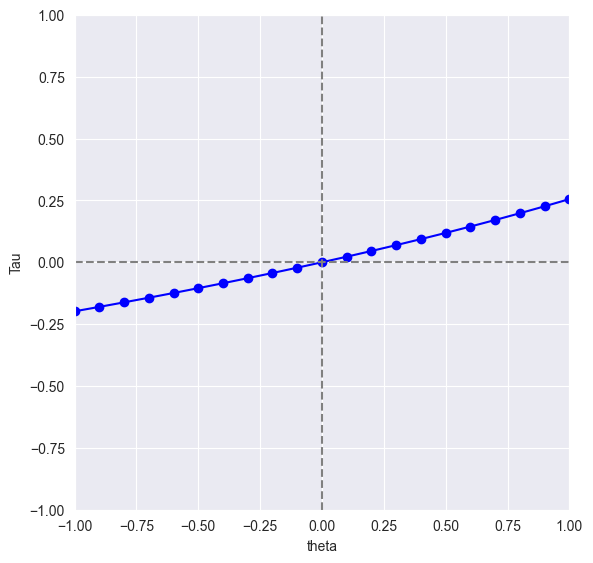

In [2]:
### thetaを-1から1まで0.1刻みに変化させて，CCコピュラのケンドール順位相関係数を算出する。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# thetaの値を-1から1まで0.1刻みで生成
theta_vals = np.arange(-1, 1.01, 0.1)
tau_vals = [Kendall_tau_for_CC_copula(theta) for theta in theta_vals]

# プロット
fig_contour = plt.figure(figsize=(6, 6))

ax1 = fig_contour.add_subplot(1, 1, 1)
ax1.plot(theta_vals, tau_vals, marker='o', linestyle='-', color='blue')
ax1.set_xlabel('theta')
ax1.set_ylabel('Tau')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()
